In [21]:
!ls /mnt/data/physionet.org/files/ms-cxr/1.1.0/

convert_coco_json_to_csv.py  MS_CXR_Local_Alignment_v1.1.0.csv
index.html		     MS_CXR_Local_Alignment_v1.1.0.json
LICENSE.txt		     SHA256SUMS.txt


In [78]:
import pandas as pd

In [23]:
ms_cxr_local_alignment_df = pd.read_csv('/mnt/data/physionet.org/files/ms-cxr/1.1.0/MS_CXR_Local_Alignment_v1.1.0.csv')

In [24]:
ms_cxr_local_alignment_df

,dicom_id,category_name,label_text,path,x,y,w,h,image_width,image_height,split
0,675d792f-a3521e48-5eec8573-1e81d644-e60c34f8,Pneumonia,Bibasilar opacities,files/p10/p10233088/s54276838/675d792f-a3521e4...,196,1136,532,315,1767,2021,train
1,675d792f-a3521e48-5eec8573-1e81d644-e60c34f8,Pneumonia,Bibasilar opacities,files/p10/p10233088/s54276838/675d792f-a3521e4...,1009,1134,491,350,1767,2021,train
2,5318d353-daae9c3d-2ee8648e-32b65198-aeff801e,Pneumonia,Bilateral multifocal areas of consolidation,files/p10/p10123147/s50230934/5318d353-daae9c3...,1510,1268,755,796,2539,3050,train
3,5318d353-daae9c3d-2ee8648e-32b65198-aeff801e,Pneumonia,Bilateral multifocal areas of consolidation,files/p10/p10123147/s50230934/5318d353-daae9c3...,454,690,637,670,2539,3050,train
4,4decce85-c6ede74e-7a8bc81c-e81edee9-5ec17116,Pneumothorax,Large right-sided pneumothorax,files/p10/p10500801/s58577720/4decce85-c6ede74...,265,90,880,2198,3056,2544,train
...,...,...,...,...,...,...,...,...,...,...,...
1443,18e1246d-a9c790ca-6b40ea18-81b9ccc8-3469c113,Pleural Effusion,Small bilateral pleural effusions,files/p15/p15445857/s50967054/18e1246d-a9c790c...,1057,1198,760,435,1950,1826,test
1444,f7e3f8a3-7299389e-84a7eb76-0cb81c79-06875895,Pleural Effusion,Persistent moderate-to-large bilateral pleural...,files/p12/p12668169/s54438962/f7e3f8a3-7299389...,322,972,1076,1239,2539,3050,train
1445,f7e3f8a3-7299389e-84a7eb76-0cb81c79-06875895,Pleural Effusion,Persistent moderate-to-large bilateral pleural...,files/p12/p12668169/s54438962/f7e3f8a3-7299389...,1755,907,748,1304,2539,3050,train
1446,0677ec27-61328435-0dfee3b9-356bfc03-8cbd3353,Pleural Effusion,Small bilateral pleural effusions are presumed,files/p13/p13859188/s52811469/0677ec27-6132843...,601,1515,998,412,3056,2544,train


In [92]:
ms_cxr_local_alignment_df[ms_cxr_local_alignment_df.dicom_id == '09d5f30e-922a26ad-712b751d-defb41d7-f206cded']

,dicom_id,category_name,label_text,path,x,y,w,h,image_width,image_height,split
814,09d5f30e-922a26ad-712b751d-defb41d7-f206cded,Edema,Moderate pulmonary edema,files/p19/p19155768/s56844524/09d5f30e-922a26a...,502,931,707,993,3056,2544,train
815,09d5f30e-922a26ad-712b751d-defb41d7-f206cded,Edema,Moderate pulmonary edema,files/p19/p19155768/s56844524/09d5f30e-922a26a...,1742,1010,811,1027,3056,2544,train
1128,09d5f30e-922a26ad-712b751d-defb41d7-f206cded,Cardiomegaly,enlarged cardiac silhouette,files/p19/p19155768/s56844524/09d5f30e-922a26a...,1162,1175,1388,809,3056,2544,train


In [79]:
len(ms_cxr_local_alignment_df.dicom_id.unique())

1047

In [80]:
len(ms_cxr_local_alignment_df.label_text.unique())

715

In [84]:
len(ms_cxr_local_alignment_df[['dicom_id', 'label_text']].drop_duplicates())

1160

In [27]:
from collections import Counter

Counter(ms_cxr_local_alignment_df.split)

Counter({'train': 1020, 'val': 212, 'test': 216})

In [54]:
Counter(ms_cxr_local_alignment_df.category_name)

Counter({'Pneumonia': 231,
         'Pneumothorax': 264,
         'Consolidation': 185,
         'Atelectasis': 98,
         'Edema': 87,
         'Cardiomegaly': 333,
         'Lung Opacity': 108,
         'Pleural Effusion': 142})

In [1]:
from importlib import reload
import medvqa

In [11]:
reload(medvqa.datasets.ms_cxr)

<module 'medvqa.datasets.ms_cxr' from '/home/pamessina/medvqa/medvqa/datasets/ms_cxr/__init__.py'>

In [12]:
from medvqa.datasets.ms_cxr import PhraseGroundingAnnotationsVisualizer, export_images_and_annotations_to_zip

In [13]:
pgav = PhraseGroundingAnnotationsVisualizer()

Image path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10233088/s54276838/675d792f-a3521e48-5eec8573-1e81d644-e60c34f8.jpg
Label text: Bibasilar opacities
Category name: Pneumonia
x: 1009, y: 1134, w: 491, h: 350


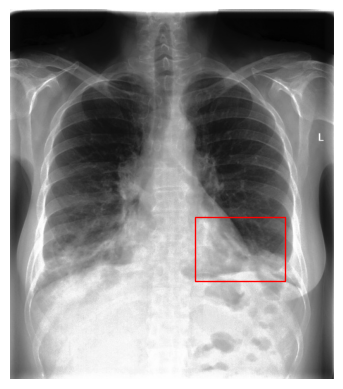

In [14]:
pgav.visualize_row(1)

Found 2 rows for dicom_id 675d792f-a3521e48-5eec8573-1e81d644-e60c34f8
Image path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10233088/s54276838/675d792f-a3521e48-5eec8573-1e81d644-e60c34f8.jpg
Label text: Bibasilar opacities
Category name: Pneumonia
x: 56.792303338992646, y: 328.8273132112816, w: 154.1505376344086, h: 91.18010885700149
Label text: Bibasilar opacities
Category name: Pneumonia
x: 292.36445953593665, y: 328.24839188520536, w: 142.27051499717035, h: 101.311232063335


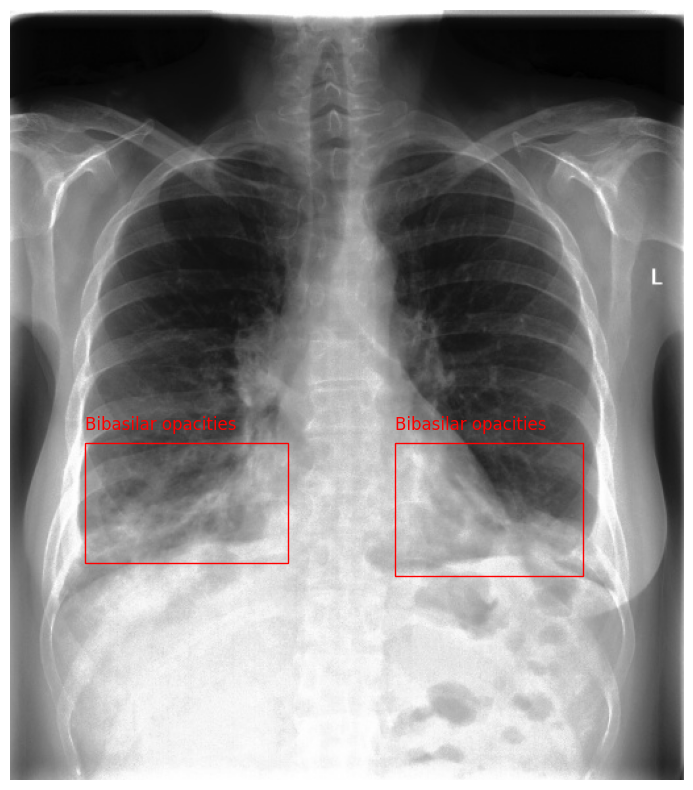

In [15]:
pgav.visualize_dicom_id('675d792f-a3521e48-5eec8573-1e81d644-e60c34f8')
# pgav.visualize_dicom_id('4decce85-c6ede74e-7a8bc81c-e81edee9-5ec17116')
# pgav.visualize_dicom_id('2c84c825-2889fd51-2e46959d-586c6113-74033204')

Found 5 rows for dicom_id 2c84c825-2889fd51-2e46959d-586c6113-74033204
Image path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p18/p18341991/s56421788/2c84c825-2889fd51-2e46959d-586c6113-74033204.jpg
Label text: bilateral edema, consolidation, ground-glass opacities
Category name: Consolidation
x: 107.87704918032786, y: 61.90783773139031, w: 182.68524590163935, h: 352.4915320992517
Label text: bilateral edema, consolidation, ground-glass opacities
Category name: Consolidation
x: 342.5852459016393, y: 88.3245372193777, w: 201.23606557377047, h: 342.61047656557696
Label text: bilateral edema, consolidation, ground-glass opacities
Category name: Edema
x: 107.87704918032786, y: 61.90783773139031, w: 182.68524590163935, h: 352.4915320992517
Label text: bilateral edema, consolidation, ground-glass opacities
Category name: Edema
x: 342.5852459016393, y: 88.3245372193777, w: 201.23606557377047, h: 342.61047656557696
Label text: enlarged cardiac silhouette
Category name: Cardio

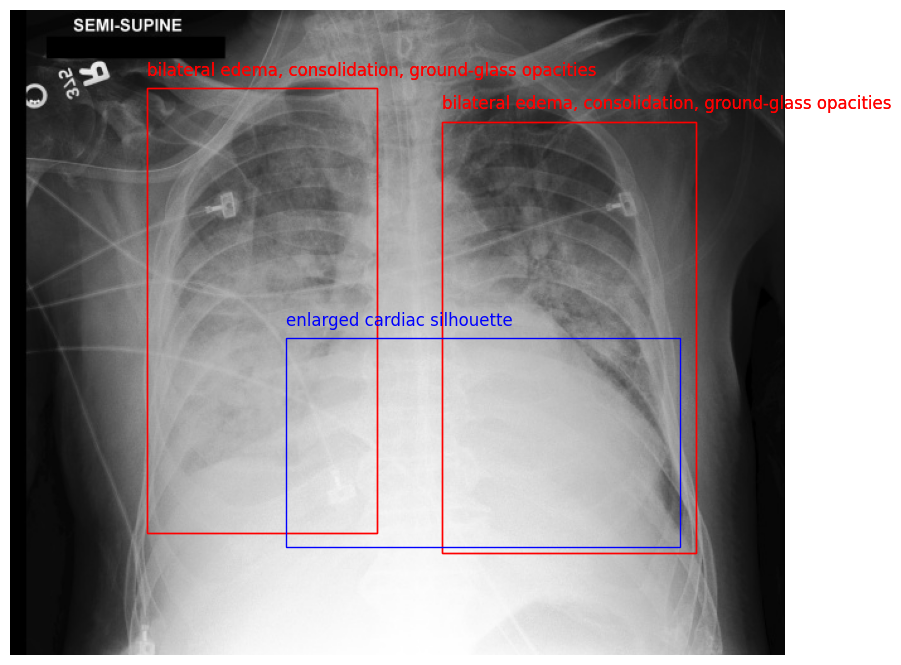

In [16]:
# pgav.visualize_dicom_id('675d792f-a3521e48-5eec8573-1e81d644-e60c34f8')
# pgav.visualize_dicom_id('4decce85-c6ede74e-7a8bc81c-e81edee9-5ec17116')
pgav.visualize_dicom_id('2c84c825-2889fd51-2e46959d-586c6113-74033204')

Found 1 rows for dicom_id 95c32485-da7e26a7-53e671b5-6a7687d4-0347ee81
Image path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10476869/s52231166/95c32485-da7e26a7-53e671b5-6a7687d4-0347ee81.jpg
Label text: Moderate right pleural effusion is still present
Category name: Pleural Effusion
x: 84.92473821989529, y: 374.94339622641513, w: 209.89692408376965, h: 110.8930817610063


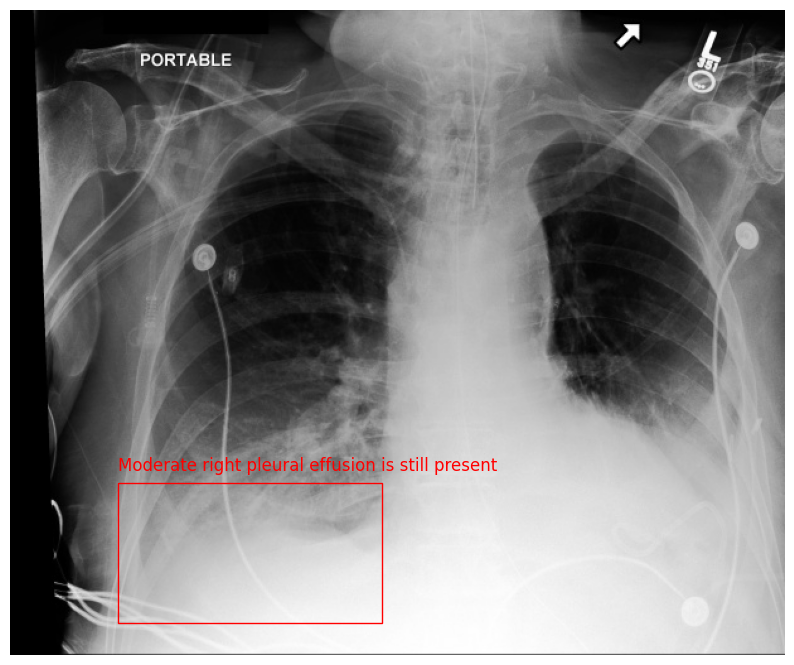

In [52]:
pgav.visualize_dicom_id('95c32485-da7e26a7-53e671b5-6a7687d4-0347ee81')

Found 2 rows for dicom_id 30fe40e1-ab514475-aa387b0a-e1718b1b-ba680a97
Image path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10530041/s51640314/30fe40e1-ab514475-aa387b0a-e1718b1b-ba680a97.jpg
Label text: Right apical pneumothorax
Category name: Pneumothorax
x: 109.77602701181767, y: 120.37407224146462, w: 167.1131119864941, h: 79.48144482929243
Label text: left perihilar and lower lobe opacities
Category name: Pneumonia
x: 316.3624085537423, y: 301.51113310242454, w: 107.18289251547553, h: 164.72241464621473


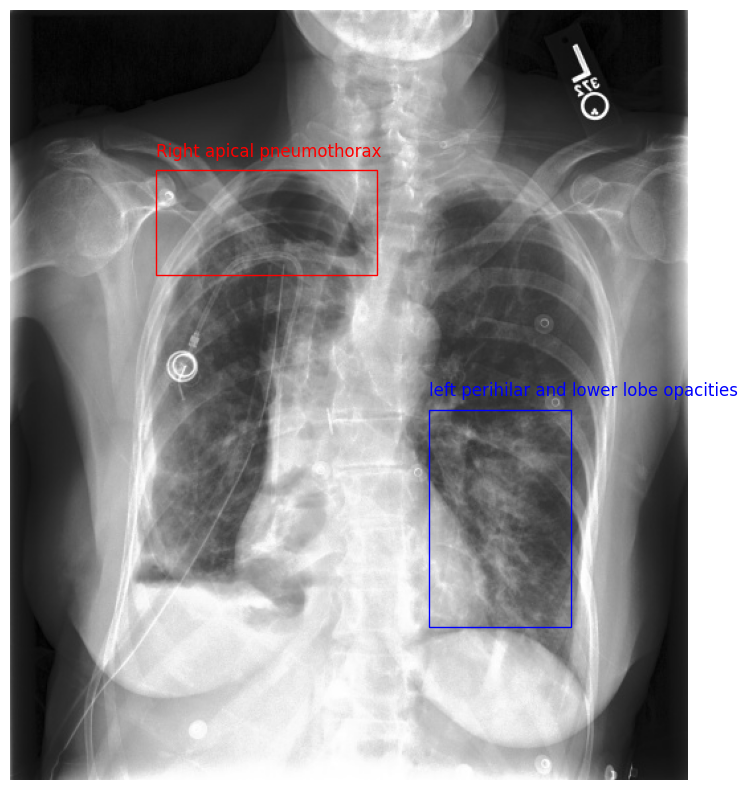

In [53]:
pgav.visualize_dicom_id('30fe40e1-ab514475-aa387b0a-e1718b1b-ba680a97')

Found 2 rows for dicom_id 09bcae55-47d8afaa-5cd21ca4-2cc83c46-d432bd6d
Image path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10402372/s50879902/09bcae55-47d8afaa-5cd21ca4-2cc83c46-d432bd6d.jpg
Label text: patchy bilateral pulmonary opacities
Category name: Lung Opacity
x: 44.88050314465409, y: 24.954188481675395, w: 200.0503144654088, h: 445.1505235602094
Label text: patchy bilateral pulmonary opacities
Category name: Lung Opacity
x: 311.34591194968556, y: 32.60143979057592, w: 167.64779874213838, h: 463.06119109947645


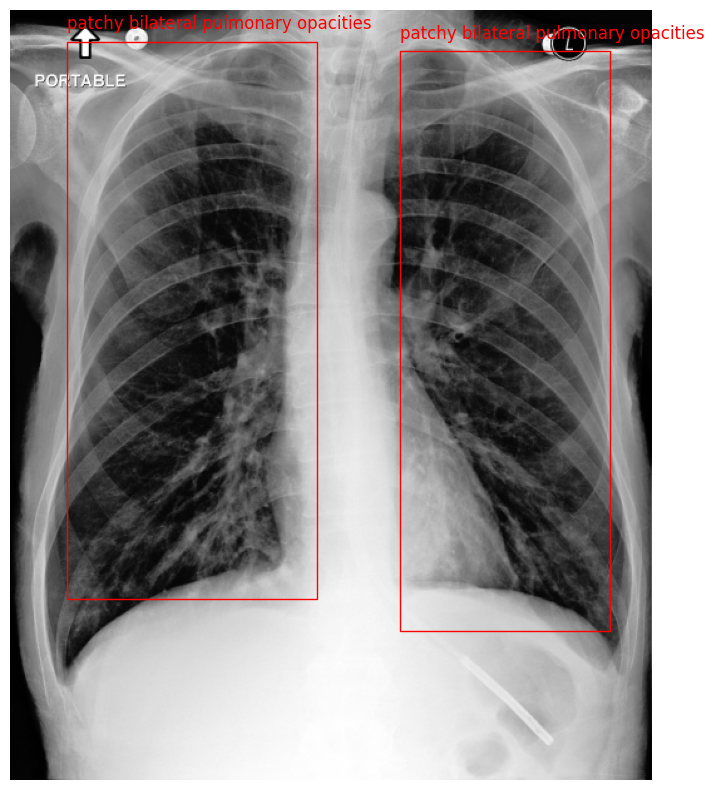

In [17]:
pgav.visualize_random_dicom_id()

Found 1 rows for dicom_id 475f1b25-8c659725-53ce9a05-4dcfbf84-648981b9
Image path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10421218/s51489361/475f1b25-8c659725-53ce9a05-4dcfbf84-648981b9.jpg
Label text: Small medial left-sided pneumothorax
Category name: Pneumothorax
x: 299.4344262295082, y: 44.36392280425364, w: 26.818032786885244, h: 106.87672311933832


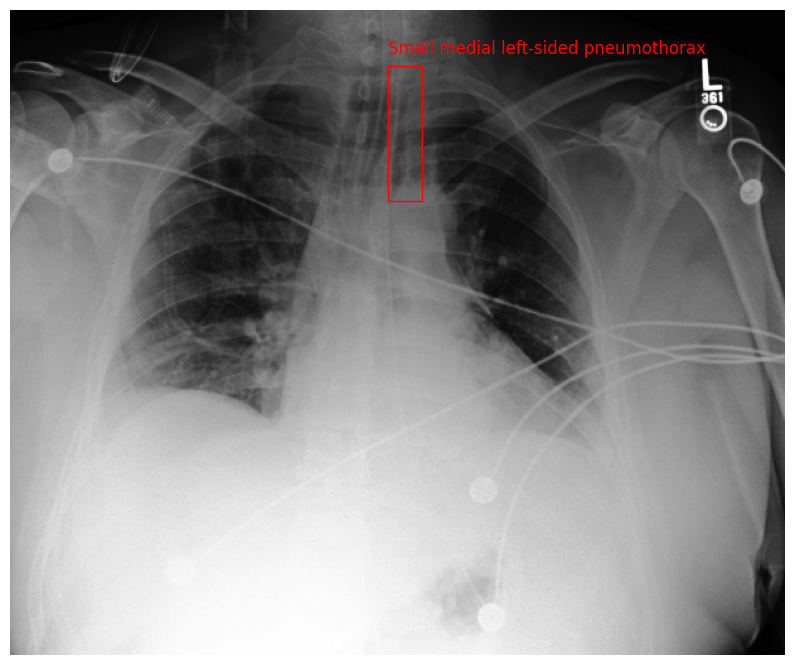

In [18]:
pgav.visualize_random_dicom_id()

Found 2 rows for dicom_id c75d44a3-9721af75-c6c723d7-54bc997d-65b06f50
Image path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p11/p11665626/s58718017/c75d44a3-9721af75-c6c723d7-54bc997d-65b06f50.jpg
Label text: bilateral patchy parenchymal opacities, compatible with consolidation
Category name: Consolidation
x: 71.38032786885246, y: 128.25206774320597, w: 180.26557377049178, h: 266.38519102008667
Label text: bilateral patchy parenchymal opacities, compatible with consolidation
Category name: Consolidation
x: 332.5032786885246, y: 119.58093737692005, w: 178.04754098360655, h: 278.68609688853877


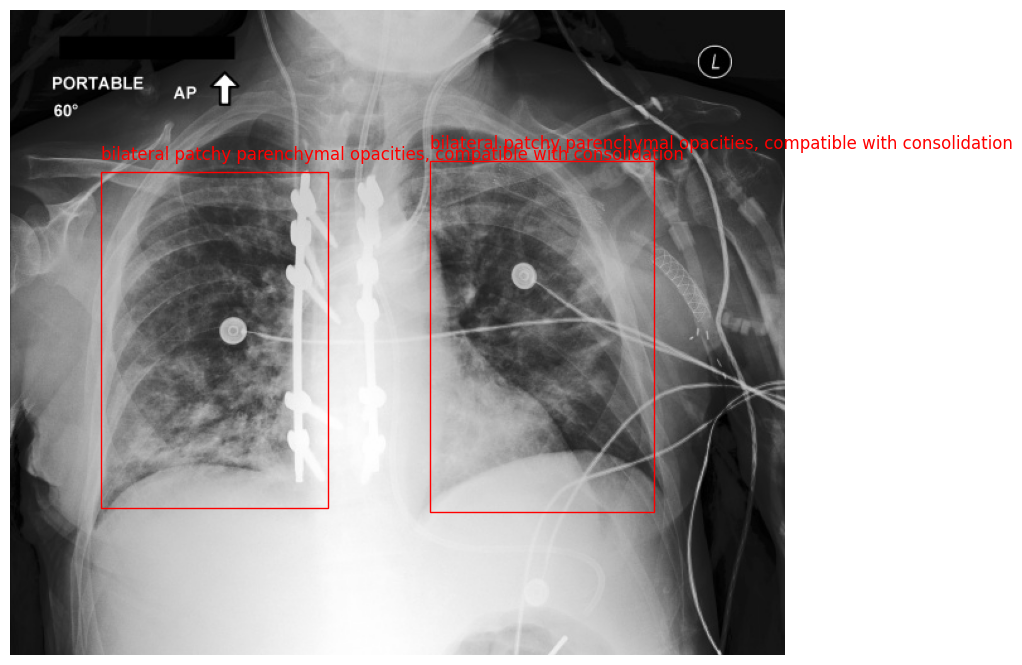

In [19]:
pgav.visualize_random_dicom_id()

In [26]:
best_x = None
max_rows = 0
for x, rows in pgav.dicom_id_2_rows.items():
    if len(rows) > max_rows:
        max_rows = len(rows)
        best_x = x

In [27]:
best_x, max_rows

('2c84c825-2889fd51-2e46959d-586c6113-74033204', 5)

In [63]:
ls /home/pamessina/

 chexpert/                   radgraph_conllformat/
'Diplomado IALab 2020-1'/    radgraph_conllformat.tar.gz
 downloaded_binaries/        radiology_annotation_web_app/
 dygiepp/                    radiology_annotation_web_app_2/
 installers/                 tmp.jpg
 medvqa/                    'Tutorial NLG iHEALTH 2022-2'/
 medvqa-workspace/           venv/
 miniconda3/                 venv2/
 nltk_data/                  wheels/
 openai-quickstart-node/     YOLOv5/
 openai-quickstart-python/


In [73]:
export_images_and_annotations_to_zip('/home/pamessina/', 'ms_cxr_images_and_annotations.zip', num_images=100)

Images and annotations exported to ms_cxr_images_and_annotations.zip in /home/pamessina/


In [29]:
from medvqa.utils.files import list_filepaths_with_prefix_and_timestamps

list_filepaths_with_prefix_and_timestamps("/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_pos_neg_facts")

[('/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_pos_neg_facts_with_GPT4_mined_labels(nf=403416,nl=28,ngpt4=87528)(hash=741,3592138487644435704).pkl',
  '2025-02-06 10:29:07'),
 ('/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_pos_neg_facts_with_GPT4_mined_labels(num_facts=403416)(hash=667,519549387085821745).pkl',
  '2025-02-05 23:06:36'),
 ('/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_pos_neg_facts(num_rel_facts=404064,num_clusters=100,max_neg=500,skip_nli)(hash=980,2800495312613355816).pkl.random_vectors.pkl',
  '2025-02-03 17:07:33'),
 ('/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_pos_neg_facts(num_rel_facts=404064,num_clusters=100,max_neg=500,skip_nli)(hash=980,2800495312613355816).pkl',
  '2025-02-03 05:03:43'),
 ('/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-wo

In [34]:
from medvqa.utils.files import load_pickle

tmp = load_pickle('/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_pos_neg_facts_with_GPT4_mined_labels(nf=403416,nl=28,ngpt4=87528)(hash=741,3592138487644435704).pkl')

In [35]:
tmp.keys()

dict_keys(['facts', 'embeddings', 'dicom_id_to_pos_facts', 'dicom_id_to_strong_neg_facts', 'dicom_id_to_weak_neg_facts'])

In [45]:
from medvqa.datasets.mimiccxr import get_detailed_metadata_for_dicom_id

In [48]:
from medvqa.utils.logging import print_bold
from medvqa.utils.files import read_txt

dicom_id = 'c75d44a3-9721af75-c6c723d7-54bc997d-65b06f50'

metadata = get_detailed_metadata_for_dicom_id(dicom_id)
print_bold('metadata:')
print(metadata)

print()
print_bold('report:')
print(read_txt(metadata[0]['filepath']))

print()
print_bold('positive facts:')
for i in tmp['dicom_id_to_pos_facts'][dicom_id]:
    print(tmp['facts'][i])
    
print()
print_bold('strong negative facts:')
for i in tmp['dicom_id_to_strong_neg_facts'][dicom_id]:
    print(tmp['facts'][i])
    
print()
print_bold('weak negative facts:')
count = 0
for i in tmp['dicom_id_to_weak_neg_facts'][dicom_id]:
    print(tmp['facts'][i])
    count += 1
    if count == 30: break

metadata:
[{'report_index': 36085, 'part_id': 11, 'subject_id': 11665626, 'study_id': 58718017, 'dicom_id': 'c75d44a3-9721af75-c6c723d7-54bc997d-65b06f50', 'view_pos': 'AP', 'split': 'train', 'filepath': '/mnt/data/mimic-cxr/files/p11/p11665626/s58718017.txt', 'dicom_id_view_pos_pairs': [('c75d44a3-9721af75-c6c723d7-54bc997d-65b06f50', 'AP')]}]

report:
                                 FINAL REPORT
 EXAMINATION:  CHEST (PORTABLE AP)
 
 INDICATION:  ___ year old man with PCP PNA ___/p extubation on CVVH  // eval
 interval change      eval interval change
 
 COMPARISON:  Prior chest radiographs ___ through ___ at 13:37.
 
 IMPRESSION: 
 
 Lung volumes are lower.  This may account in part for greater of opacification
 in the left lung today.  Both lungs are still affected by heterogeneous
 opacification greatest in the lower lobes.  There is no pleural effusion. 
 Mild cardiomegaly is chronic.  Feeding tube ends in the upper stomach.  Left
 supraclavicular central venous catheter ends in 

Computed IoU: 0.2958


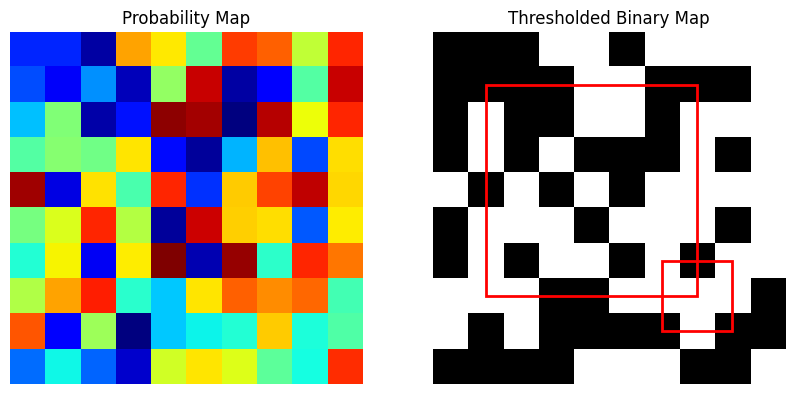

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box as shapely_box
from shapely.ops import unary_union

def compute_probability_map_iou(prob_map, gt_coords, conf_th):
    """
    Compute the Intersection over Union (IoU) between the predicted probability map and ground truth bounding boxes.

    Parameters:
    - prob_map (numpy.ndarray): A 2D array (height, width) representing the probability map.
    - gt_coords (numpy.ndarray): An array of shape (num_boxes, 4) containing normalized ground truth bounding boxes in (x_min, y_min, x_max, y_max) format.
    - conf_th (float): Confidence threshold for binarizing the probability map.

    Returns:
    - float: The computed IoU between the binary probability map and the ground truth bounding boxes.
    """
    assert prob_map.ndim == 2, "Probability map must be a 2D array"
    height, width = prob_map.shape
    binary_map = prob_map > conf_th
    
    # Generate predicted bounding boxes based on the binary probability map
    pred_boxes = []
    cell_w, cell_h = 1 / width, 1 / height
    for y in range(height):
        for x in range(width):
            if binary_map[y, x]:
                x_min, y_min = x * cell_w, y * cell_h
                x_max, y_max = (x + 1) * cell_w, (y + 1) * cell_h
                pred_boxes.append(shapely_box(x_min, y_min, x_max, y_max))
    
    if not pred_boxes:
        return 0.0  # No predicted bounding boxes, IoU is 0
    
    # Compute union of predicted bounding boxes
    pred_union = unary_union(pred_boxes)
    
    # Compute union of ground truth bounding boxes
    gt_boxes = [shapely_box(x_min, y_min, x_max, y_max) for x_min, y_min, x_max, y_max in gt_coords]
    gt_union = unary_union(gt_boxes)
    
    # Compute intersection
    intersection = pred_union.intersection(gt_union).area
    union = pred_union.area + gt_union.area - intersection
    
    return intersection / union if union > 0 else 0.0

# Example usage and visualization
height, width = 10, 10
prob_map = np.random.rand(height, width)  # Generate a random probability map
conf_th = 0.5

gt_coords = np.array([[0.1, 0.1, 0.7, 0.7], [0.6, 0.6, 0.8, 0.8]])  # Normalized ground truth boxes

# Compute IoU
iou = compute_probability_map_iou(prob_map, gt_coords, conf_th)
print(f"Computed IoU: {iou:.4f}")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(prob_map, cmap='jet', interpolation='nearest')
ax[0].set_title("Probability Map")
ax[0].axis("off")

binary_map = prob_map > conf_th
ax[1].imshow(binary_map, cmap='gray', interpolation='nearest')
ax[1].set_title("Thresholded Binary Map")
ax[1].axis("off")

for x_min, y_min, x_max, y_max in gt_coords:
    rect = plt.Rectangle((x_min * width, y_min * height), (x_max - x_min) * width, (y_max - y_min) * height, fill=False, edgecolor='red', linewidth=2)
    ax[1].add_patch(rect)

plt.show()

In [77]:
import numpy as np
np.random.choice(10, size=10, replace=True)

array([1, 5, 4, 9, 8, 4, 1, 4, 3, 6])